In [38]:
import pandas as pd
from torch.optim import Optimizer

from music_dataset import MusicTracksDataset
from music_classifier import MusicGenreClassifier
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 45
BATCH_SIZE = 64

In [25]:
print(device)

cpu


In [26]:
df = pd.read_csv('dataset_subset.csv')

In [27]:
df.shape

(15000, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15000 non-null  int64  
 1   track_id          15000 non-null  object 
 2   artists           14999 non-null  object 
 3   album_name        14999 non-null  object 
 4   track_name        14999 non-null  object 
 5   popularity        15000 non-null  int64  
 6   duration_ms       15000 non-null  int64  
 7   explicit          15000 non-null  bool   
 8   danceability      15000 non-null  float64
 9   energy            15000 non-null  float64
 10  key               15000 non-null  int64  
 11  loudness          15000 non-null  float64
 12  mode              15000 non-null  int64  
 13  speechiness       15000 non-null  float64
 14  acousticness      15000 non-null  float64
 15  instrumentalness  15000 non-null  float64
 16  liveness          15000 non-null  float6

In [29]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,21719,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid;Skepta,Made In Lagos,Longtime (feat. Skepta),55,239893,True,0.850,0.660,...,-4.846,0,0.1690,0.4170,0.000051,0.2090,0.622,101.947,4,dancehall
1,25741,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Tango saute,Dom na wiślanym brzegu,31,209093,False,0.640,0.758,...,-7.310,0,0.0675,0.4970,0.000000,0.0506,0.849,106.978,4,disco
2,15850,5VcFzH97JEHgXgedErp4cP,Jayla Darden,"Ideas, Vol. 2",Idea 686,53,163235,False,0.712,0.347,...,-10.363,0,0.0410,0.3780,0.021200,0.1110,0.500,135.975,4,chill
3,31992,7oMBY3VmIxqNVeZ7yneYuN,Chino & Nacho,Perreo Tenebroso Vol. 2,Me Voy Enamorando,0,235720,False,0.686,0.912,...,-3.411,1,0.0685,0.0533,0.000000,0.3920,0.511,99.952,4,electro
4,79027,3eDX2SnjVRG9hh0v074eEO,OneRepublic,Christmas Songs 2022,Christmas Without You,1,197146,False,0.262,0.677,...,-5.645,1,0.0528,0.4470,0.000000,0.2050,0.365,207.478,3,piano


In [ ]:
targets = {genre: i for i, genre in enumerate(df['track_genre'].unique())}

In [30]:
targets = {genre: i for i, genre in enumerate(df['track_genre'].unique())}

In [33]:
df['track_genre'] = df['track_genre'].map(targets)

In [34]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,21719,1JiR4RJaZlbZ5b3HG8jkeL,Wizkid;Skepta,Made In Lagos,Longtime (feat. Skepta),55,239893,True,0.850,0.660,...,-4.846,0,0.1690,0.4170,0.000051,0.2090,0.622,101.947,4,0
1,25741,6cfNBFSKFB59wO8xIFZ0qI,Ivan komarenko,Tango saute,Dom na wiślanym brzegu,31,209093,False,0.640,0.758,...,-7.310,0,0.0675,0.4970,0.000000,0.0506,0.849,106.978,4,1
2,15850,5VcFzH97JEHgXgedErp4cP,Jayla Darden,"Ideas, Vol. 2",Idea 686,53,163235,False,0.712,0.347,...,-10.363,0,0.0410,0.3780,0.021200,0.1110,0.500,135.975,4,2
3,31992,7oMBY3VmIxqNVeZ7yneYuN,Chino & Nacho,Perreo Tenebroso Vol. 2,Me Voy Enamorando,0,235720,False,0.686,0.912,...,-3.411,1,0.0685,0.0533,0.000000,0.3920,0.511,99.952,4,3
4,79027,3eDX2SnjVRG9hh0v074eEO,OneRepublic,Christmas Songs 2022,Christmas Without You,1,197146,False,0.262,0.677,...,-5.645,1,0.0528,0.4470,0.000000,0.2050,0.365,207.478,3,4


In [35]:
df = df.drop(['track_id', 'artists', 'album_name', 'Unnamed: 0', 'track_name'], axis=1)

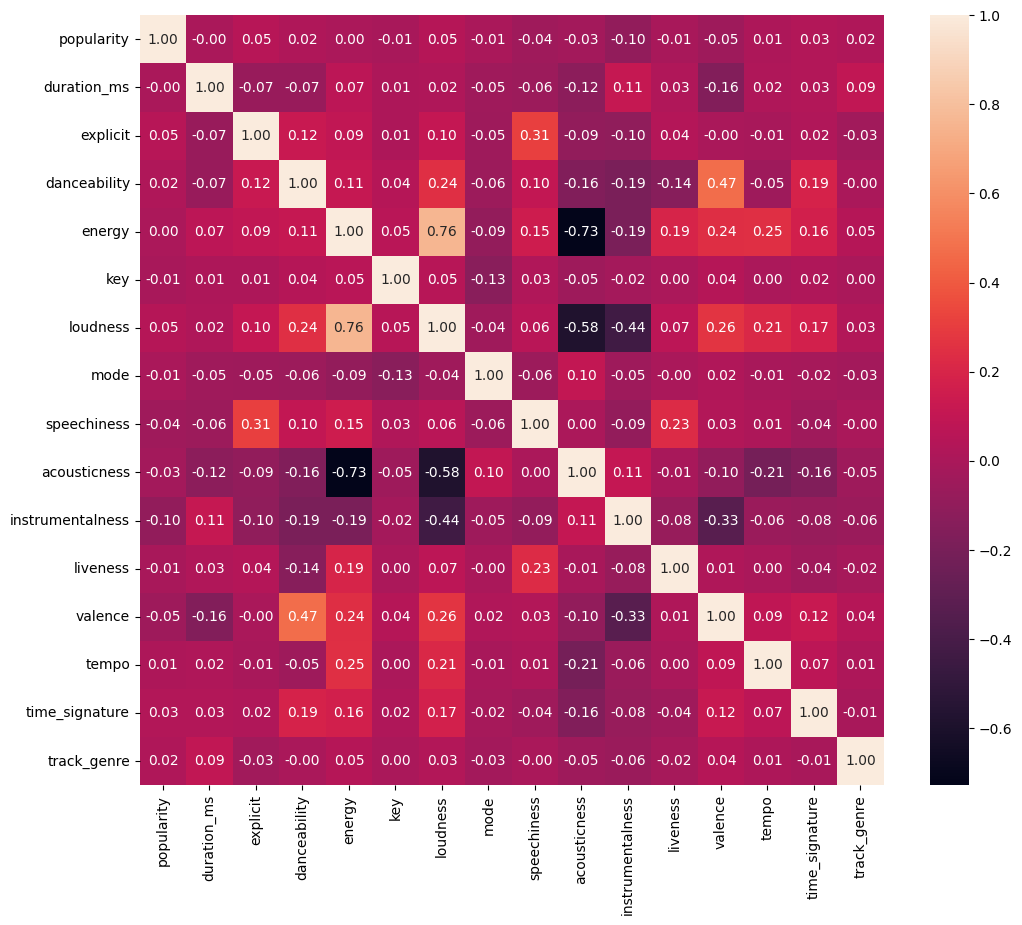

In [41]:

plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt=".2f")

plt.show()

### From the Correlation matrix, we know there isn't much correlation betweeh the features and the target

#### Load the dataset in the form Torch

In [42]:
mean, std = MusicTracksDataset.compute_mean_std('dataset_subset.csv')

In [43]:
trainset = MusicTracksDataset('dataset_subset.csv', train=True, mean=mean, std=std)

In [44]:
testset = MusicTracksDataset('dataset_subset.csv', train=False, mean=mean, std=std)

In [45]:
input_size = trainset.get_input_size()
output_size = trainset.get_output_size()
input_size, output_size

(15, 114)

In [46]:
model = MusicGenreClassifier(input_size = input_size, output_size=output_size)

In [47]:
model

MusicGenreClassifier(
  (fc1): Linear(in_features=15, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=114, bias=True)
)

In [48]:
model.to(device)

MusicGenreClassifier(
  (fc1): Linear(in_features=15, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=114, bias=True)
)

In [49]:
loss_function = nn.CrossEntropyLoss()

In [50]:
def perform_train_training(optimizer: Optimizer):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
    testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Train the model. In PyTorch we have to implement the training loop ourselves.
    for i in range(EPOCHS):
        model.train()  # Set model in training mode.
        train_loss = 0.0
        train_correct = 0
        train_batches = 0

        for sample in trainloader:
            inputs, targets = sample['features'].to(device), sample['label'].to(device)

            # Zero the parameter gradients.
            optimizer.zero_grad()

            # Forward pass.
            outputs = model(inputs)
            # Cross-entropy loss does not need one-hot targets in PyTorch.
            loss = loss_function(outputs, targets)

            # Accumulate metrics.
            _, indices = torch.max(outputs.data, 1)
            train_correct += (indices == targets).sum().item()
            train_batches += 1
            train_loss += loss.item()

            # Backward pass and update.
            loss.backward()
            optimizer.step()

        train_loss = train_loss / train_batches
        train_acc = train_correct / (train_batches * BATCH_SIZE)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
          

        # Evaluate the model on the test dataset. Identical to loop above but without
        # weight adjustment.
        model.eval()  # Set model in inference mode.
        test_loss = 0.0
        test_correct = 0
        test_batches = 0
        for sample in trainloader:
            inputs, targets = sample['features'].to(device), sample['label'].to(device)

            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            _, indices = torch.max(outputs, 1)
            test_correct += (indices == targets).sum().item()
            test_batches += 1
            test_loss += loss.item()

        test_loss = test_loss / test_batches
        test_acc = test_correct / (test_batches * BATCH_SIZE)

        # Append metrics
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f'Epoch {i + 1}/{EPOCHS} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}')
    return train_losses, train_accuracies, test_losses, test_accuracies


In [51]:
def plot(train_losses , train_accuracies,  test_losses ,test_accuracies):
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss')
    plt.plot(range(1, EPOCHS+1), test_losses, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, EPOCHS+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, EPOCHS+1), test_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

### The Optimizers we're looking at are `Adam`, `RMSProps` and `LBGFS`.

#### Let's start with `Adam`

In [52]:
train_losses , train_accuracies,  test_losses ,test_accuracies = perform_train_training(optimizer=model.get_adam_optimizer())

Epoch 1/45 loss: 4.0567 - acc: 0.0952 - val_loss: 3.4817 - val_acc: 0.1759
Epoch 2/45 loss: 3.4014 - acc: 0.1807 - val_loss: 3.1672 - val_acc: 0.2235
Epoch 3/45 loss: 3.1686 - acc: 0.2169 - val_loss: 3.0086 - val_acc: 0.2411
Epoch 4/45 loss: 3.0377 - acc: 0.2402 - val_loss: 2.8723 - val_acc: 0.2685
Epoch 5/45 loss: 2.9402 - acc: 0.2501 - val_loss: 2.7782 - val_acc: 0.2856
Epoch 6/45 loss: 2.8402 - acc: 0.2662 - val_loss: 2.7162 - val_acc: 0.2921
Epoch 7/45 loss: 2.7660 - acc: 0.2792 - val_loss: 2.6398 - val_acc: 0.3012
Epoch 8/45 loss: 2.6994 - acc: 0.2933 - val_loss: 2.5673 - val_acc: 0.3206
Epoch 9/45 loss: 2.6316 - acc: 0.3091 - val_loss: 2.4991 - val_acc: 0.3350
Epoch 10/45 loss: 2.5879 - acc: 0.3162 - val_loss: 2.4306 - val_acc: 0.3456
Epoch 11/45 loss: 2.5202 - acc: 0.3278 - val_loss: 2.3518 - val_acc: 0.3670
Epoch 12/45 loss: 2.4506 - acc: 0.3371 - val_loss: 2.2868 - val_acc: 0.3764
Epoch 13/45 loss: 2.4033 - acc: 0.3463 - val_loss: 2.2502 - val_acc: 0.3832
Epoch 14/45 loss: 2.3

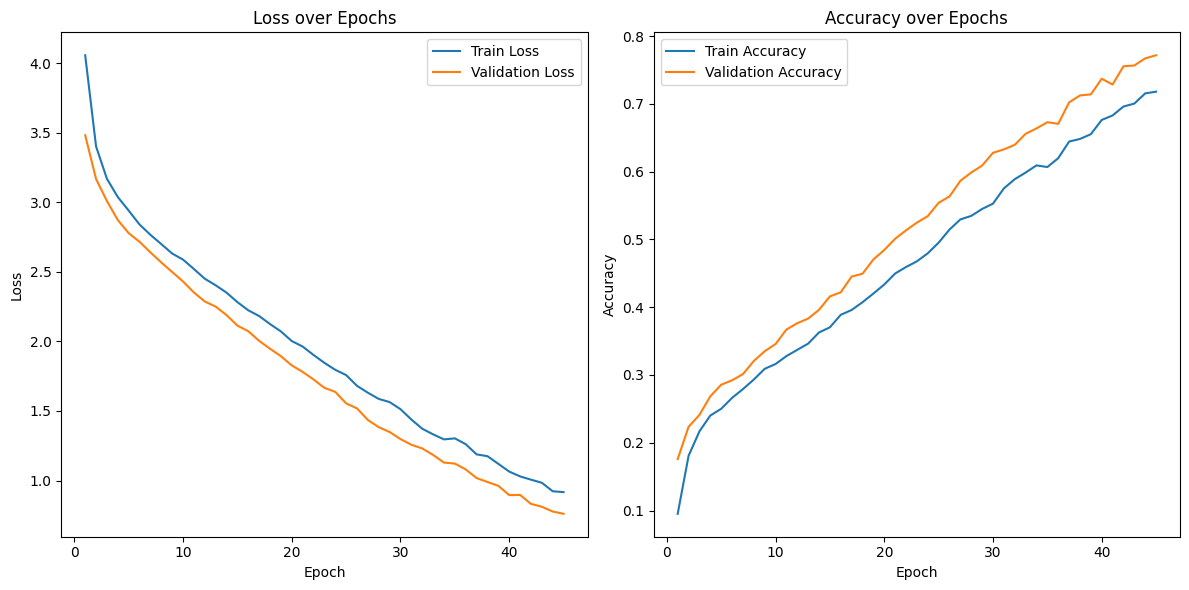

In [53]:
plot(train_losses , train_accuracies,  test_losses ,test_accuracies)

#### `RMSProps`

In [54]:
train_losses_rms , train_accuracies_rms,  test_losses_rms ,test_accuracies_rms = perform_train_training(optimizer=model.get_rms_optimizer())

Epoch 1/45 loss: 7.9266 - acc: 0.1196 - val_loss: 4.4923 - val_acc: 0.1244
Epoch 2/45 loss: 3.3852 - acc: 0.1726 - val_loss: 3.6436 - val_acc: 0.1463
Epoch 3/45 loss: 3.2729 - acc: 0.1897 - val_loss: 5.2018 - val_acc: 0.1180
Epoch 4/45 loss: 3.2250 - acc: 0.1973 - val_loss: 3.2740 - val_acc: 0.1891
Epoch 5/45 loss: 3.1154 - acc: 0.2123 - val_loss: 3.5490 - val_acc: 0.1930
Epoch 6/45 loss: 3.0701 - acc: 0.2234 - val_loss: 3.3533 - val_acc: 0.2090
Epoch 7/45 loss: 3.0071 - acc: 0.2294 - val_loss: 3.5051 - val_acc: 0.2009
Epoch 8/45 loss: 2.9514 - acc: 0.2398 - val_loss: 3.0119 - val_acc: 0.2459
Epoch 9/45 loss: 2.9152 - acc: 0.2490 - val_loss: 3.0240 - val_acc: 0.2446
Epoch 10/45 loss: 2.8698 - acc: 0.2500 - val_loss: 2.9564 - val_acc: 0.2547
Epoch 11/45 loss: 2.8130 - acc: 0.2570 - val_loss: 3.2382 - val_acc: 0.2324
Epoch 12/45 loss: 2.7814 - acc: 0.2667 - val_loss: 3.0074 - val_acc: 0.2556
Epoch 13/45 loss: 2.7502 - acc: 0.2714 - val_loss: 2.9076 - val_acc: 0.2672
Epoch 14/45 loss: 2.7

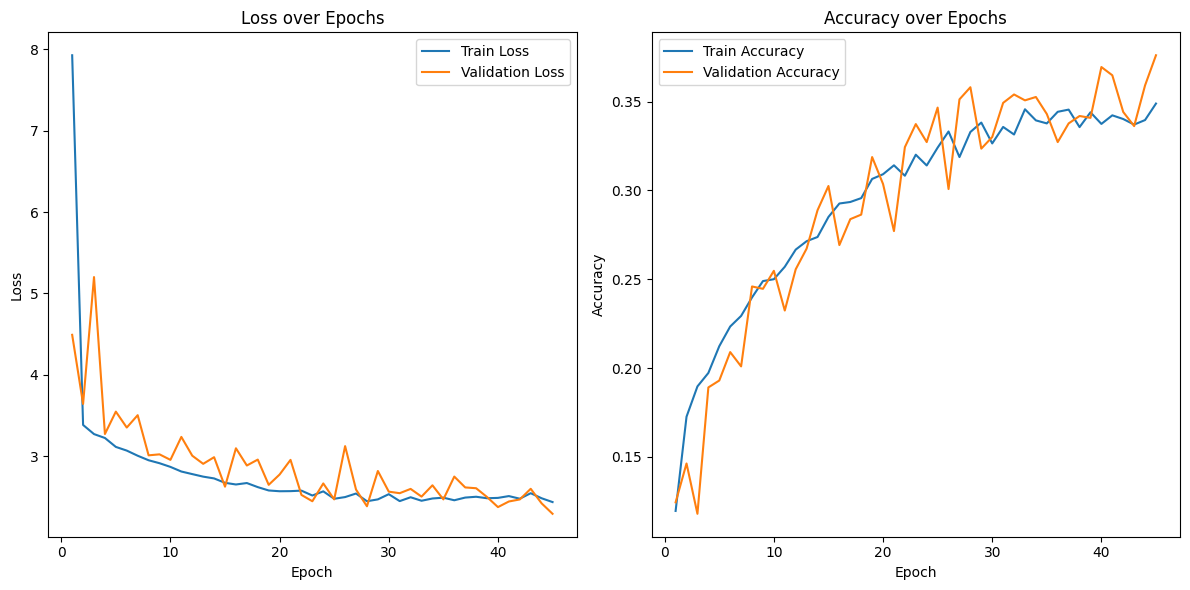

In [55]:
plot(train_losses_rms , train_accuracies_rms,  test_losses_rms ,test_accuracies_rms)

#### `Adagrad`

In [58]:
from torch.optim import Adagrad

In [60]:
train_losses_l , train_accuracies_l,  test_losses_l ,test_accuracies_l = perform_train_training(optimizer=Adagrad(model.parameters()))

Epoch 1/45 loss: 2.0423 - acc: 0.4241 - val_loss: 1.7714 - val_acc: 0.4864
Epoch 2/45 loss: 1.7687 - acc: 0.4855 - val_loss: 1.6727 - val_acc: 0.5084
Epoch 3/45 loss: 1.6832 - acc: 0.5035 - val_loss: 1.6280 - val_acc: 0.5193
Epoch 4/45 loss: 1.6296 - acc: 0.5157 - val_loss: 1.5834 - val_acc: 0.5263
Epoch 5/45 loss: 1.5944 - acc: 0.5219 - val_loss: 1.5701 - val_acc: 0.5333
Epoch 6/45 loss: 1.5723 - acc: 0.5289 - val_loss: 1.5425 - val_acc: 0.5380
Epoch 7/45 loss: 1.5536 - acc: 0.5335 - val_loss: 1.5264 - val_acc: 0.5432
Epoch 8/45 loss: 1.5323 - acc: 0.5384 - val_loss: 1.5031 - val_acc: 0.5473
Epoch 9/45 loss: 1.5148 - acc: 0.5433 - val_loss: 1.4898 - val_acc: 0.5512
Epoch 10/45 loss: 1.5051 - acc: 0.5467 - val_loss: 1.4910 - val_acc: 0.5551
Epoch 11/45 loss: 1.4910 - acc: 0.5496 - val_loss: 1.4723 - val_acc: 0.5566
Epoch 12/45 loss: 1.4769 - acc: 0.5514 - val_loss: 1.4530 - val_acc: 0.5603
Epoch 13/45 loss: 1.4701 - acc: 0.5563 - val_loss: 1.4501 - val_acc: 0.5604
Epoch 14/45 loss: 1.4

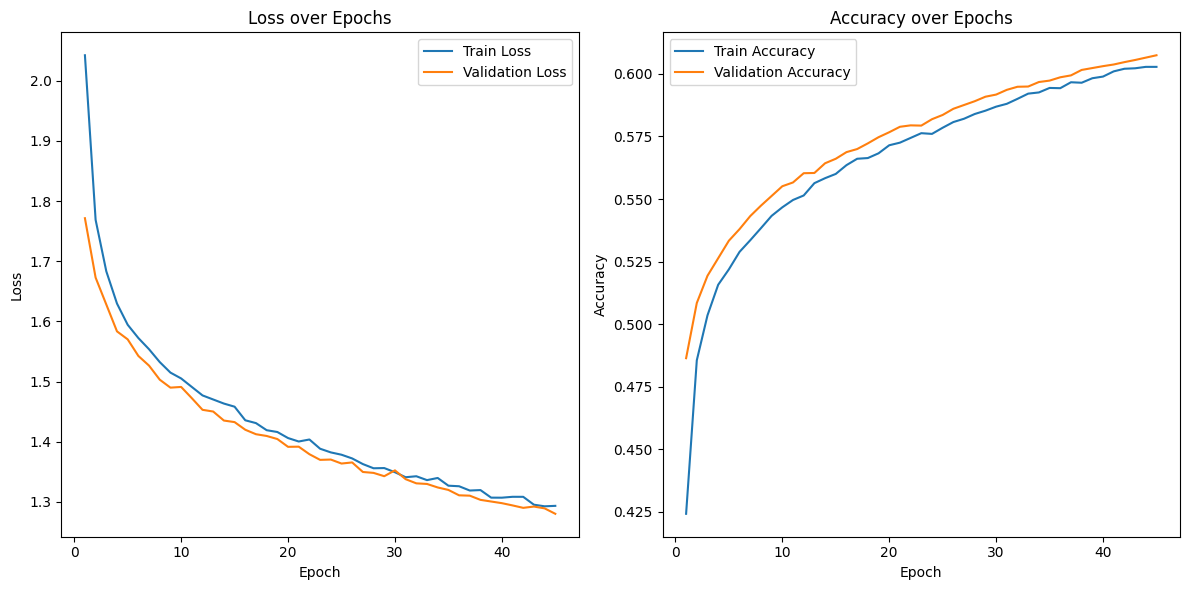

In [61]:
plot(train_losses_l , train_accuracies_l,  test_losses_l ,test_accuracies_l)


##Analysis of Optimizer Performance

### ADAM Optimizer:
ADAM is a popular optimizer known for its effectiveness in handling sparse gradients and adapting the learning rate for each parameter. In this case, ADAM showed significant improvement over the training period, starting with a training accuracy of 9.52% and reaching 71.81% by the end of 45 epochs. The validation accuracy also saw a consistent increase, starting at 17.59% and ending at 77.18%. The loss metrics for both training and validation showed a steady decline, indicating effective learning and generalization capabilities.

### RMSProp Optimizer:
RMSProp is designed to adapt the learning rate for each parameter, aiming to balance the scale of gradients. However, in this scenario, RMSProp's performance was not as strong as ADAM's. It started with a training accuracy of 11.96% and reached 34.89% by the end of the training, with validation accuracy peaking at 37.60%. The loss metrics decreased over time but not as efficiently as seen with ADAM, indicating slower and less effective learning.

### AdaGrad Optimizer:
AdaGrad adapts the learning rate to the parameters, performing larger updates for infrequent parameters. It started with a notably higher initial accuracy compared to RMSProp and showed consistent improvement throughout the training, ending with a training accuracy of 60.28% and a validation accuracy of 60.75%. The loss metrics showed a gradual and consistent reduction, which is a positive sign of learning and adaptation to the training data.


### Conclusions:

`ADAM` demonstrated the best overall performance among the three optimizers, achieving the highest accuracy and the most significant reduction in loss metrics. Its adaptability to different parameters' learning rates likely contributed to its superior performance, making it highly effective for this specific task.

`RMSProp`, while designed to address some of the same issues as ADAM, did not perform as well in this context. Its final accuracy was the lowest, and the loss reduction was less efficient, indicating it might not have been the best fit for this particular problem or data.

`AdaGrad` showed solid performance, with a consistent improvement in accuracy and loss reduction. It was outperformed by ADAM but still proved to be a reliable choice for adaptive learning rate optimization.

Overall, the selection of an optimizer can significantly impact the performance of a machine learning model. ADAM's ability to efficiently adapt learning rates and handle sparse gradients makes it a strong candidate for a wide range of problems. However, the effectiveness of an optimizer can depend on the specific characteristics of the data and the model architecture. It's always recommended to experiment with different optimizers and their parameters to identify the best fit for your specific task.